- I used Linear and Polynomial Regression to capture both simple and complex relationships between the 12th row values and the top row values. This approach ensures we can model both linear and non-linear patterns to improve prediction accuracy.

In [3]:
# importing suitable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
# Load the data from the Excel file
file_path = 'me.xlsx'
try:
    data = pd.read_excel(file_path, header=None)
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

In [5]:
# Extract the top row (B1 to CD1) and the 12th row (B12 to CD12)
top_row = data.iloc[0, 1:].astype(float)  # Top row
row_12 = data.iloc[11, 1:].astype(float)  # 12th row

In [6]:
# Handle missing values (if any)
top_row = top_row.fillna(top_row.mean())
row_12 = row_12.fillna(row_12.mean())

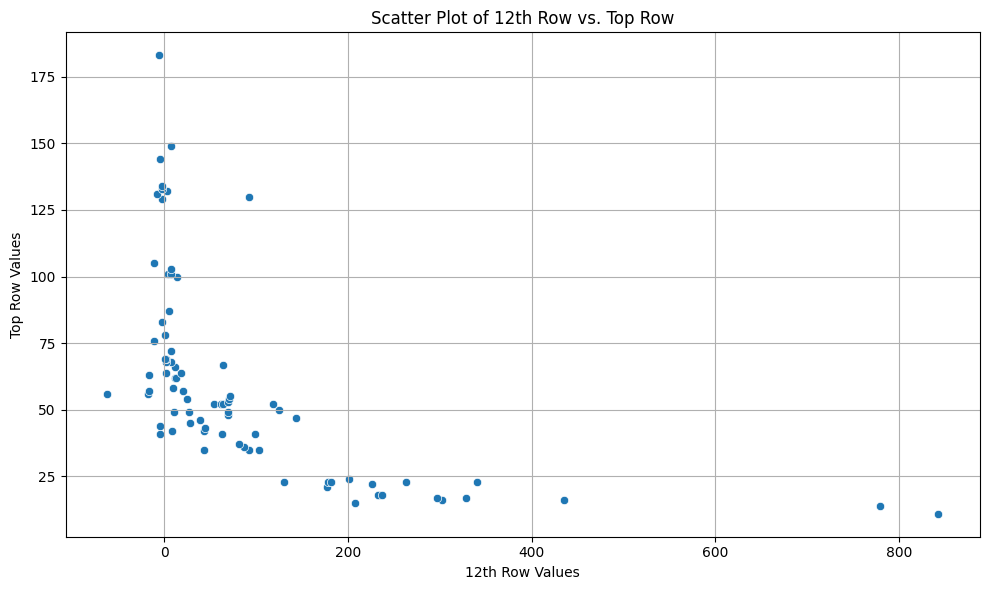

In [7]:
# Scatter plot of the 12th row vs. top row
plt.figure(figsize=(10, 6))
sns.scatterplot(x=row_12, y=top_row)
plt.xlabel('12th Row Values')
plt.ylabel('Top Row Values')
plt.title('Scatter Plot of 12th Row vs. Top Row')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Try Different Regression Models

In [8]:
# Prepare data for Linear and Polynomial Regression
X = row_12.values.reshape(-1, 1)
y = top_row.values

In [9]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

In [10]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)  # You can try different degrees
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

In [13]:
print(f'Linear Regression MAE: {mean_absolute_error(y, y_pred_linear)}')
print(f'Polynomial Regression MAE: {mean_absolute_error(y, y_pred_poly)}')

Linear Regression MAE: 22.97466872713006
Polynomial Regression MAE: 19.88755760470632


#### Extract the Model Formula

In [14]:
# Extract the formula for Linear Regression
intercept = linear_model.intercept_
coef = linear_model.coef_

print(f'Linear Regression Formula: y = {intercept} + {coef[0]} * x')


Linear Regression Formula: y = 71.55339578795133 + -0.1339366989585949 * x


In [15]:
# Extract the formula for Polynomial Regression
intercept_poly = poly_model.intercept_
coef_poly = poly_model.coef_

print(f'Polynomial Regression Formula: y = {intercept_poly} + {coef_poly[1]} * x + {coef_poly[2]} * x^2')

Polynomial Regression Formula: y = 79.3778545044168 + -0.322669571922232 * x + 0.000302219274730231 * x^2


##### Visualize the Best-Fitting Model

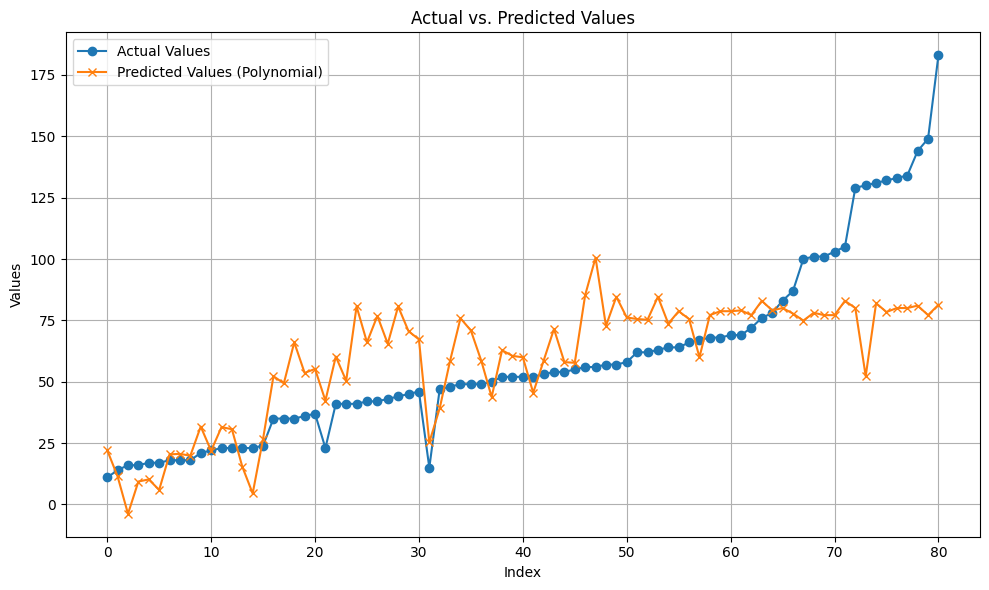

In [16]:
# Plot the actual vs. predicted values for the best-fitting model
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Values', marker='o')
plt.plot(y_pred_poly, label='Predicted Values (Polynomial)', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
predicted_top_row = poly_model.predict(X_poly)


In [19]:
predicted_top_row

array([ 22.13923074,  11.41730487,  -3.79596702,   9.35542361,
        10.20345165,   5.93208186,  20.42149328,  20.60302645,
        19.8805204 ,  31.73356793,  21.89068293,  31.5181862 ,
        30.66270367,  15.4199621 ,   4.48988996,  26.73123147,
        52.25023783,  49.34913288,  66.06186635,  53.59309944,
        55.22447984,  42.29452556,  60.24917977,  50.395618  ,
        80.6733683 ,  66.06186635,  76.81583996,  65.4697178 ,
        80.6733683 ,  70.5800464 ,  67.25341672,  25.33779825,
        39.18025503,  58.55252001,  75.86505775,  70.88609391,
        58.55252001,  43.76633418,  62.83496903,  60.53407194,
        59.96489205,  45.5109462 ,  58.55252001,  71.50000225,
        57.99180226,  57.71235005,  85.28382584, 100.54509886,
        72.73507219,  84.61793579,  76.18138071,  75.54933922,
        75.23422513,  84.61793579,  73.66772125,  78.73372424,
        75.54933922,  59.96489205,  77.13397625,  78.73372424,
        78.73372424,  79.05548715,  77.13397625,  82.96

In [21]:
predicted_vs_actual = pd.DataFrame({
    'Actual': top_row,
    'Predicted': predicted_top_row
})

print(predicted_vs_actual)


    Actual  Predicted
1     11.0  22.139231
2     14.0  11.417305
3     16.0  -3.795967
4     16.0   9.355424
5     17.0  10.203452
..     ...        ...
77   133.0  80.024403
78   134.0  80.024403
79   144.0  80.998758
80   149.0  77.133976
81   183.0  81.324752

[81 rows x 2 columns]
